In [ ]:
import pandas as pd
import re
from TranscriptPlotter import TranscriptPlotter
%load_ext autoreload
%autoreload 2

In [ ]:
tp = TranscriptPlotter('./test.txt')
tp.parse()
tp.plot()

In [ ]:
df = pd.DataFrame({'person': tp.title_list, 'lines': tp.content_list})

# remove things with parentheses like (PAUSE), (BREAK), and other cut off phrases
df = df[~df['person'].str.contains(r'^\(.*\)$')]
# remove page numbers
df = df[~df['person'].str.contains(r'\d+\.')]
# remove indicators that end with :
df = df[~df['person'].str.endswith(':')]
# take first word of each title phrase (cleans things like 'Mark (V.O)', replaces with 'Mark')
df['person'] = df['person'].apply(lambda p: p.strip().split(' ')[0])
# remove common non-character operations, which all end with . for the fist word (like INT.)
df = df[~df['person'].str.endswith('.')]
# if not in top 20 list of chars, then don't include, used to exclude any outliers
top_20 = df['person'].value_counts()[:20]
df = df[df['person'].isin(top_20.keys())]
df

In [ ]:
with open("test.txt", "r", encoding="utf-8") as f:
    text = f.read()
    
# Roughly speaking, 
# <b> TITLE </b> content <b> TITLE2 </b> content2 <b> ...
# 1. split by <b>
# 2. strip and remove spacing (removes outer edges + strange transitions)
# 3. For each in list, split by </b>
# 4. strip and remove spacing, should have only two items
# 5. add two items correspondingly to dataframe

titles = []
contents = []

chunks = re.split(r"<b>", text)
chunks = list(filter(lambda c: c, [c.strip() for c in chunks]))
for c in chunks:
    unparsed_line = re.split(r"<\/b>", c)
    parsed_line = [l.strip() for l in unparsed_line]
    titles.append(parsed_line[0])
    contents.append(parsed_line[1])

new_df = pd.DataFrame({'title': titles, 'content': contents})
new_df


    

In [96]:
from TranscriptPlotter import TranscriptPlotter
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
tp = TranscriptPlotter('./test.txt')
tp.parse()

150.    2
1.      2
2.      1
105.    1
118.    1
       ..
57.     1
55.     1
53.     1
51.     1
161.    1
Name: title, Length: 100, dtype: int64


In [98]:
tp.extra

,title,content
14,2.,
32,3.,
48,4.,
78,6.,
98,7.,
...,...,...
2485,150.,
2502,1.,
2535,159.,
2551,160.,


In [99]:
df = tp.df
df

,title,content,syllables
2,MARK,Did you know there are more people with genius...,41
3,ERICA,That can't be true.,4
4,MARK,it is true.,3
5,ERICA,What would account for that?,7
6,MARK,"Well first of all, a lot of people live in Chi...",24
...,...,...,...
2563,MARK,Would anyone mind it I stayed and used the com...,21
2564,MARYLIN,No. There's a night guy downstairs. Stay as lo...,14
2565,MARK,"Thanks. I appreciate your help today,",11
2566,MARYLIN,"You're not an asshole, Mark. You just want to be.",13


In [100]:
df[df['title'].str.contains(r'\d+\.')]

,title,content,syllables
14,2.,,1
32,3.,,1
48,4.,,1
78,6.,,1
98,7.,,1
...,...,...,...
2485,150.,,1
2502,1.,,1
2535,159.,,1
2551,160.,,1


In [107]:
indexes = df[df['title'].str.contains(r'\d+\.')].index

scenes = len(df[df['title'].str.contains(r'\d+\.')]) + 1
size = math.ceil(math.sqrt(scenes))

size

11

In [147]:
import seaborn as sns
import random

color_labels = df[~df['title'].str.contains(r'\d+\.')]['title'].unique()
random.shuffle(color_labels)
rgb_values = sns.color_palette("Spectral", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

In [148]:
color_map

{'MARX': (0.7211072664359862, 0.11649365628604381, 0.28281430219146486),
 'TNT.': (0.8226066897347175, 0.22906574394463664, 0.30680507497116494),
 'ERICA': (0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 'LAWYER': (0.942560553633218, 0.4057670126874279, 0.2682814302191465),
 'MARYLIN': (0.9693194925028835, 0.5174163783160323, 0.30426758938869664),
 'GIRL': (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 'MARK': (0.9934640522875817, 0.7477124183006535, 0.4352941176470587),
 'SY': (0.9953094963475586, 0.8399846212995001, 0.5128027681660899),
 'JENNY': (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 'SUMMERS': (0.9990003844675125, 0.9690119184928874, 0.697039600153787),
 'AMY': (0.9750096116878124, 0.9900038446751249, 0.7100346020761246),
 'POLICEMAN': (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 'DUSTIN': (0.8565936178392929, 0.942329873125721, 0.6053056516724337),
 'GAGE': (0.7477124183006538, 0.8980392156862746, 0.62745098

102
10
20
30
40
50
60
70
80
90
100


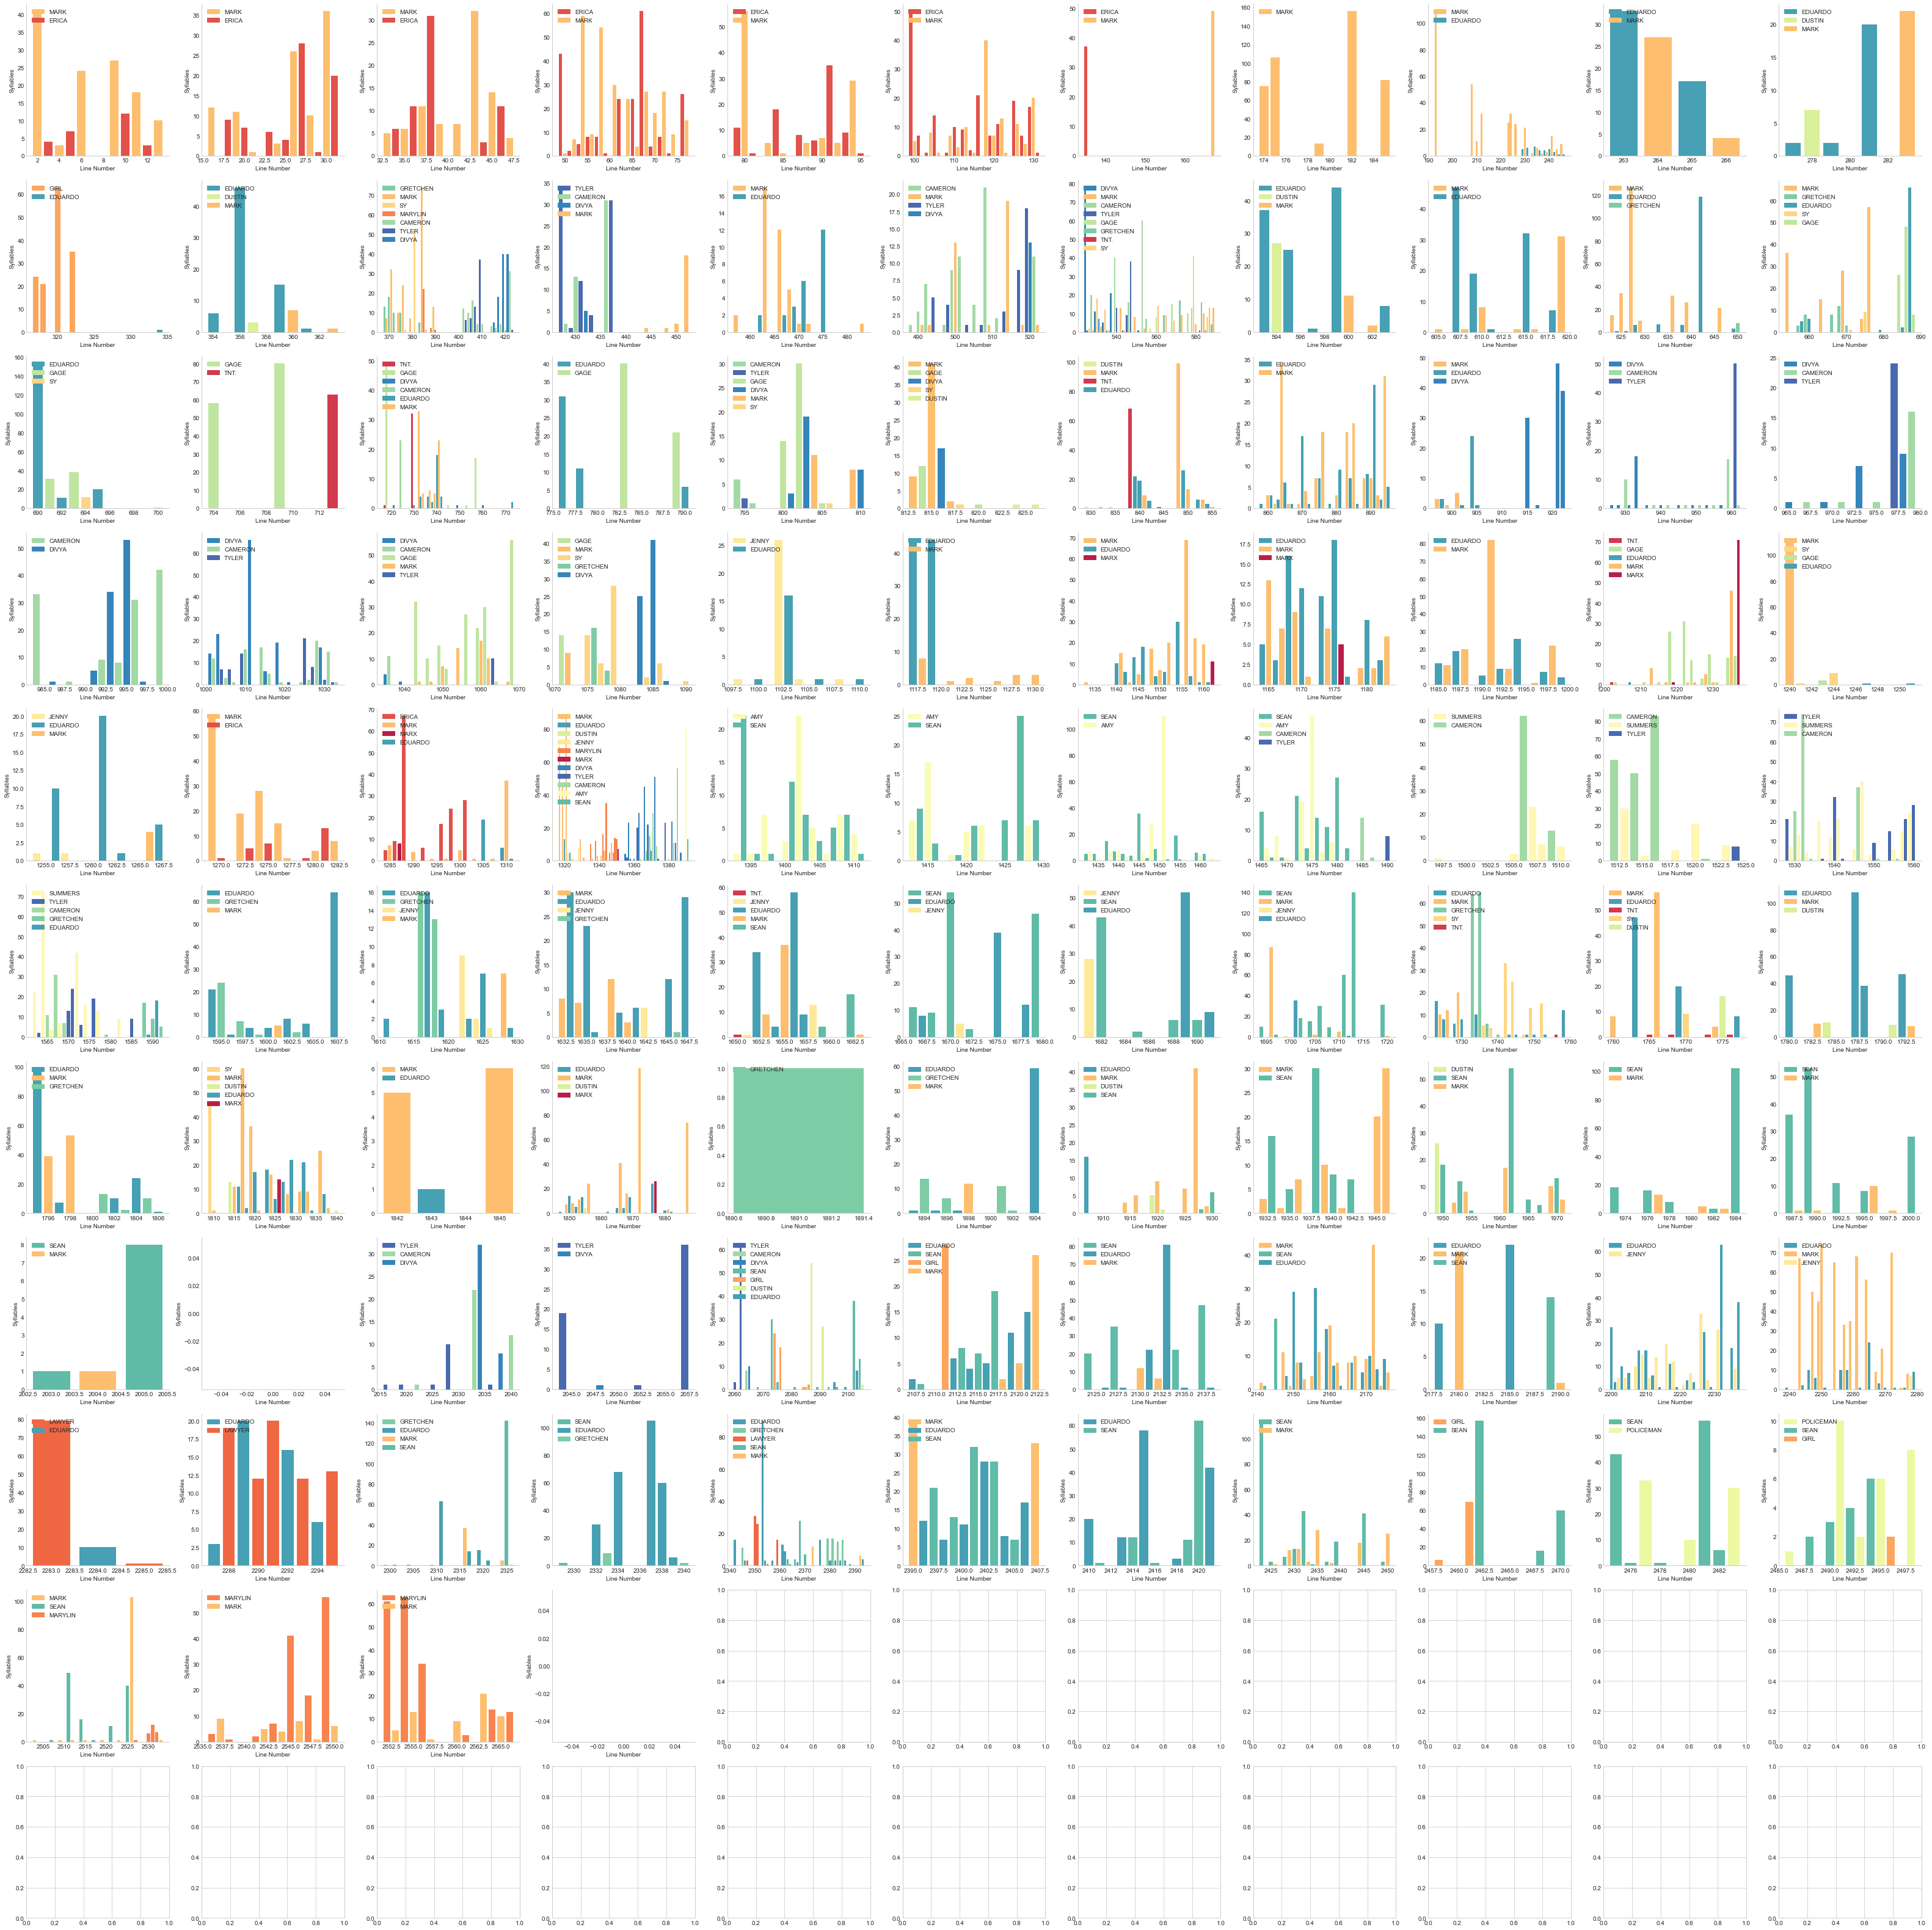

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import math

indexes = df[df['title'].str.contains(r'\d+\.')].index

scenes = len(df[df['title'].str.contains(r'\d+\.')].index) + 1
size = math.ceil(math.sqrt(scenes))

fig, ax = plt.subplots(ncols=size, nrows=size, figsize=(size * 4, size * 4))

def add_bar_plot(ax, data):
    x = data['syllables'].index
    color = data['title'].map(color_map)
    ax.bar(x=x, height=data['syllables'], color=color)
    
    # hide gridded look
    ax.grid(False)
    
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # assign colors to legend
    chars_in_plot = data['title'].unique()
    ax.legend([plt.Rectangle((0, 0), 1, 1, color=color_map[c]) for c in chars_in_plot], chars_in_plot, loc='upper left')

    ax.set_xlabel('Line Number') 
    ax.set_ylabel('Syllables') 
    
print(len(indexes))
for i, ax in enumerate(ax.flatten()):
    if i == 0:
        add_bar_plot(ax, df.loc[:indexes[0] - 1])
        continue
    
    if i == len(indexes):
        add_bar_plot(ax, df.loc[indexes[-1] + 1:])
        break

    add_bar_plot(ax, df.loc[indexes[i - 1] + 1:indexes[i] - 1])
    if i % 10 == 0: print(i)

plt.tight_layout()
plt.savefig("test.svg", bbox_inches='tight')

In [152]:
plt.savefig('test.png')

<Figure size 432x288 with 0 Axes>